# CLUSTERING SHOOTING

clustering NBA and WNBA statistics to isolate stylistic differences between the two leagues

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import cluster
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set()

## LOAD DATA

In [2]:
nba_adv = pd.read_csv("nbaadv2.csv")
wnba_adv = pd.read_csv("WNBAadvanced.csv")

## EDA

explore distributions of different stats - compare wnba vs nba

In [3]:
nba_adv['TS%'].mean()

57.93947368421052

In [4]:
nba_adv['TS%'].std()

5.74434109257075

In [5]:
wnba_adv['TS%'].mean()

52.72118644067796

In [6]:
wnba_adv['TS%'].std()

6.8473945596512165

In [7]:
nba_adv['EFG%'].mean()

54.81842105263158

In [8]:
nba_adv['EFG%'].std()

6.0928445743336095

In [9]:
wnba_adv['EFG%'].mean()

48.73474576271187

In [10]:
wnba_adv['EFG%'].std()

7.06646561299192

WNBA shooting eff stats typically lower with more variation

what types of players are at the ends of the EFG and TS spectrums of WNBA vs NBA?

In [11]:
nba_adv[nba_adv['TS%']>68]

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
5,150,Luke Kornet,BOS,27,38,26,12,11.8,111.1,106.0,...,11.2,14.2,12.8,10.6,70.9,73.1,10.7,102.04,10.6,952
10,161,Brandon Clarke,MEM,26,37,24,13,19.5,108.6,105.8,...,6.7,17.8,12.5,11.3,66.3,69.0,17.8,104.71,13.4,1561
93,239,Jericho Sims,NYK,24,32,19,13,12.3,105.2,109.9,...,13.3,18.8,16.0,12.8,77.9,78.7,8.6,101.02,11.3,830


Centers dominate high EFG and TS rates for the nba 

In [12]:
wnba_adv[wnba_adv['TS%']>50]

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PACE/40,PIE
0,A'JA WILSON,LVA,26,36,26,10,30.0,112.5,98.5,14.0,...,6.4,24.2,15.7,8.3,53.1,58.5,26.7,99.41,82.84,17.4
1,AARI MCDONALD,ATL,24,36,14,22,24.3,94.9,95.2,-0.3,...,1.6,7.4,4.5,14.6,48.6,54.8,20.9,99.88,83.24,10.1
2,ALYSSA THOMAS,CON,30,36,25,11,32.1,106.7,95.6,11.1,...,6.5,19.7,13.1,13.5,50.0,54.9,19.9,96.56,80.47,15.4
3,ARIEL ATKINS,WAS,26,36,22,14,30.0,103.1,96.4,6.7,...,3.3,8.0,5.7,8.3,50.0,54.3,21.9,94.88,79.07,9.4
4,BRIANN JANUARY,SEA,36,36,22,14,16.9,93.6,97.5,-3.8,...,1.1,4.6,2.9,19.6,47.1,50.7,13.4,96.65,80.54,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,RUTHY HEBARD,CHI,24,24,17,7,9.7,91.1,94.4,-3.3,...,4.0,14.3,9.5,16.9,51.0,53.3,12.5,100.13,83.45,6.6
110,JENNIE SIMMS,PHO,28,23,10,13,13.2,95.1,93.8,1.4,...,4.3,12.1,8.3,20.7,50.8,55.4,13.6,96.83,80.69,6.7
111,MONIQUE BILLINGS,ATL,26,23,9,14,17.4,95.6,96.2,-0.6,...,10.6,27.2,18.3,15.7,47.0,53.4,17.7,100.67,83.89,13.2
112,NATALIE ACHONWA,MIN,30,22,11,11,15.1,101.2,101.2,0.0,...,7.6,19.6,13.7,13.6,51.6,56.4,16.1,99.82,83.19,11.3


All types of different players present for WNBA

In [13]:
nba_adv[(nba_adv['TS%']<55) & (nba_adv['EFG%']<55)]

,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE,POSS
11,161,Fred VanVleet,TOR,28,37,16,21,36.8,113.2,113.2,...,1.2,11.9,6.0,6.6,47.5,53.1,22.0,97.82,11.0,2779
16,161,Kevin Love,CLE,34,37,23,14,20.6,113.0,106.9,...,5.4,30.8,18.1,10.9,50.6,54.9,18.9,99.98,12.8,1592
20,161,Talen Horton-Tucker,UTA,22,37,19,18,15.9,108.5,107.9,...,2.5,11.6,7.0,11.5,44.9,48.6,21.4,104.72,8.7,1280
23,172,Bones Hyland,DEN,22,36,25,11,20.3,111.5,119.0,...,1.4,10.2,5.7,10.1,51.6,54.8,28.0,98.52,10.4,1499
34,172,Kendrick Nunn,LAL,27,36,16,20,13.2,106.1,108.4,...,0.8,7.2,4.2,10.1,47.4,49.1,22.7,106.81,5.9,1052
40,172,Will Barton,WAS,32,36,15,21,20.2,105.8,113.6,...,1.0,12.5,6.7,9.9,46.3,49.0,18.1,100.59,7.8,1524
45,192,Cory Joseph,DET,31,35,9,26,15.6,112.4,114.0,...,1.6,6.6,4.0,7.8,45.9,49.7,14.1,100.94,7.1,1150
46,192,Daishen Nix,HOU,20,35,9,26,14.0,107.0,110.5,...,2.1,8.8,5.2,19.2,46.7,49.6,13.5,102.15,6.0,1047
47,192,Dyson Daniels,NOP,19,35,21,14,19.3,108.8,107.4,...,3.6,13.6,8.7,12.3,52.7,53.7,10.6,104.44,6.8,1466
51,192,Kelly Oubre Jr.,CHA,27,35,10,25,32.6,109.3,118.2,...,4.1,11.7,7.6,5.7,48.6,51.5,26.0,101.90,8.6,2414


how do the usage rates compare in these efficiency groups.... the NBA vs WNBA?

In [14]:
nba_adv[nba_adv['TS%']>65]
high_ts_efg_nba = nba_adv[nba_adv['TS%']>65]
usghigheff = high_ts_efg_nba['USG%']
usghigheff.mean()

14.183333333333332

In [15]:
wnba_adv[wnba_adv['TS%']>60]
high_ts_efg_wnba = wnba_adv[wnba_adv['TS%']>60]
usghigheff_w = high_ts_efg_wnba['USG%']
usghigheff_w.mean()

19.321428571428573

In [16]:
low_clust_wnba = wnba_adv[wnba_adv['TS%']< 45]
low_clust_wnba['USG%'].mean()

15.608333333333334

In [17]:
low_cluster_nba  = nba_adv[(nba_adv['TS%']< 50) & (nba_adv['EFG%']<50)]
low_cluster_nba['USG%'].mean()

16.5

Text(0.5, 1.0, 'NBA TS vs EFG')

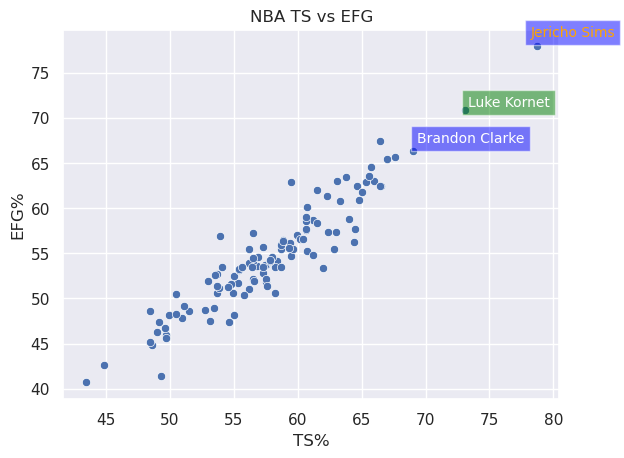

In [18]:
sns.scatterplot(data = nba_adv, x=nba_adv["TS%"], y=nba_adv['EFG%'])
plt.text(x=77.9 +0.3,
         y=78.7 + 0.3,
         s= 'Jericho Sims',
         fontdict=dict(color='orange',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=73 +0.3,
         y=71 + 0.3,
         s= 'Luke Kornet',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='green',alpha=0.5))
plt.text(x=69 +0.3,
         y=67 + 0.3,
         s= 'Brandon Clarke',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.title("NBA TS vs EFG")

Visualize distribution discrepancies between the two leagues

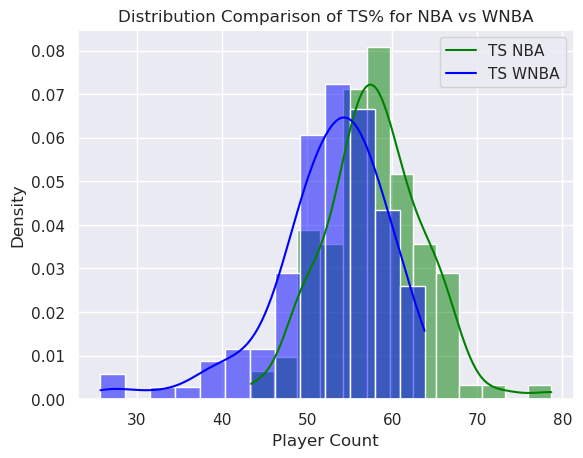

In [19]:
sns.histplot(data = nba_adv, x = 'TS%', stat = 'density', color = 'green', kde = True)
sns.histplot(data = wnba_adv, x = 'TS%', stat = 'density', color = 'blue', kde = True)
plt.xlabel('Player Count')
plt.title('Distribution Comparison of TS% for NBA vs WNBA')
plt.legend(labels=["TS NBA","TS WNBA"])

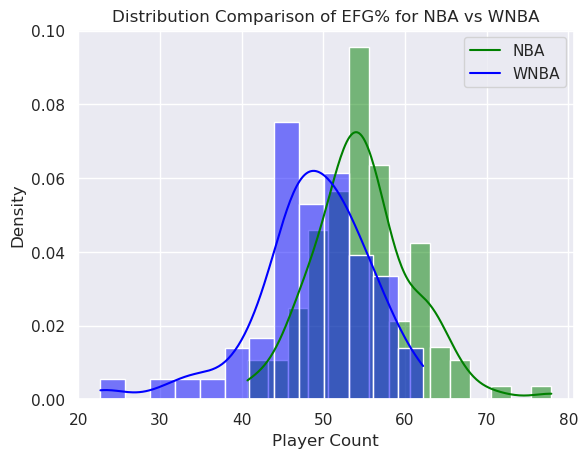

In [20]:
sns.histplot(data = nba_adv, x = 'EFG%', stat = 'density', color = 'green', kde = True)
sns.histplot(data = wnba_adv, x = 'EFG%', stat = 'density', color = 'blue', kde = True)
plt.xlabel('Player Count')
plt.title('Distribution Comparison of EFG% for NBA vs WNBA')
plt.legend(labels=["NBA","WNBA"])

Text(0.5, 1.0, 'WNBA TS vs EFG')

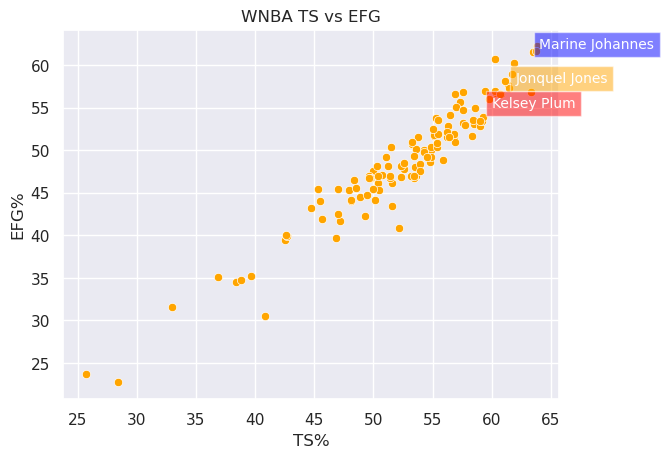

In [21]:
sns.scatterplot(x=wnba_adv["TS%"], y=wnba_adv['EFG%'], color = 'orange')
plt.text(x=63 +1,
         y=61 + 1,
         s= 'Marine Johannes',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=60,
         y=55,
         s= 'Kelsey Plum',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=62,
         y=58,
         s= 'Jonquel Jones',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='orange',alpha=0.5))
plt.title("WNBA TS vs EFG")

Text(0.5, 1.0, 'NBA USG vs TO Ratio')

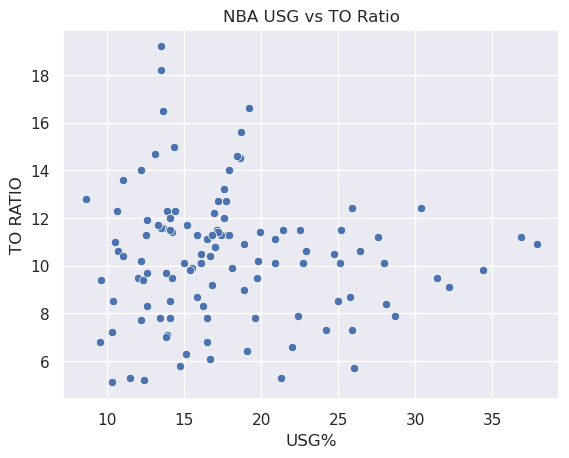

In [22]:
sns.scatterplot(x=nba_adv["USG%"], y=nba_adv['TO RATIO'])
plt.title("NBA USG vs TO Ratio")

Text(0.5, 1.0, 'WNBA USG vs TO Ratio')

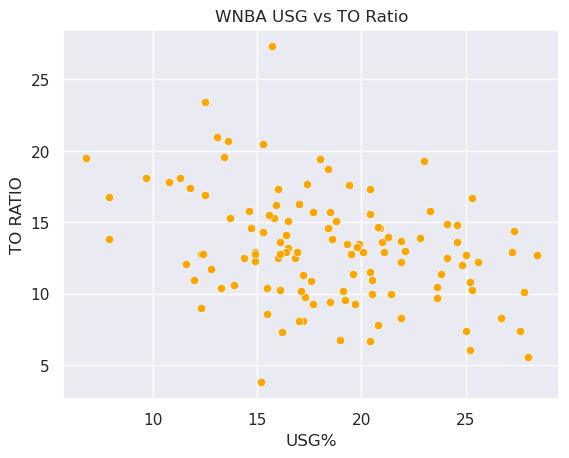

In [23]:
sns.scatterplot(x=wnba_adv["USG%"], y=wnba_adv['TO RATIO'], color = 'orange')
plt.title("WNBA USG vs TO Ratio")

Text(0.5, 1.0, 'NBA AST% vs EFG% Ratio')

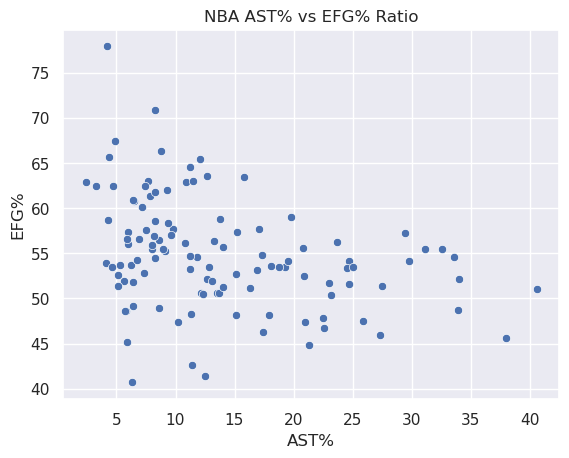

In [24]:
sns.scatterplot(x=nba_adv['AST%'], y=nba_adv['EFG%'])
plt.title("NBA AST% vs EFG% Ratio")

Text(0.5, 1.0, 'WNBA AST% vs EFG% Ratio')

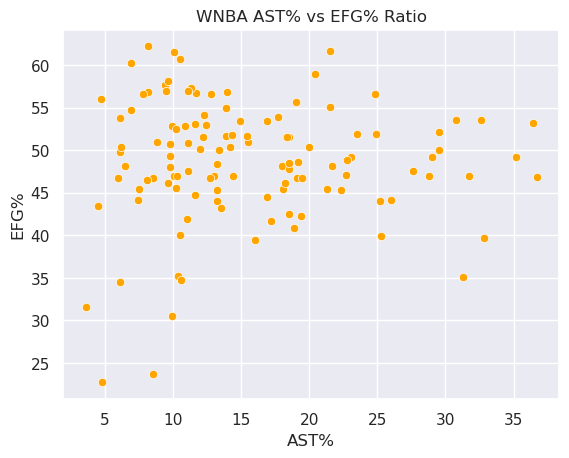

In [25]:
sns.scatterplot(x=wnba_adv['AST%'], y=wnba_adv['EFG%'], color = 'orange')
plt.title("WNBA AST% vs EFG% Ratio")

Text(0.5, 1.0, 'NBA USG% vs EFG%')

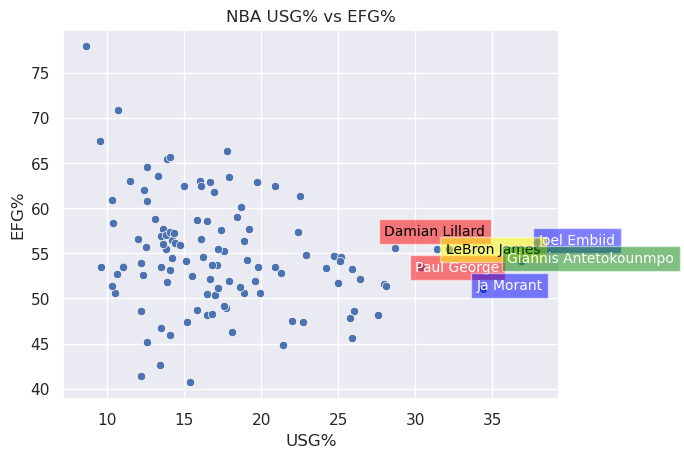

In [26]:
sns.scatterplot(x=nba_adv['USG%'], y=nba_adv['EFG%'])
plt.text(x=30,
         y=53,
         s= 'Paul George',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=28,
         y=57,
         s= 'Damian Lillard',
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=38,
         y=56,
         s= 'Joel Embiid',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=32,
         y=55,
         s= 'LeBron James',
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='yellow',alpha=0.5))
plt.text(x=36,
         y=54,
         s= 'Giannis Antetokounmpo',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='green',alpha=0.5))
plt.text(x=34,
         y=51,
         s= 'Ja Morant',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.title("NBA USG% vs EFG%")

Text(0.5, 1.0, 'WNBA USG% vs EFG%')

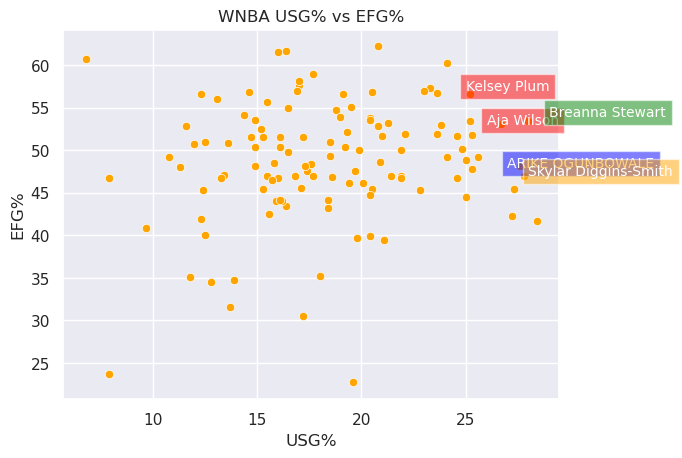

In [27]:
sns.scatterplot(x=wnba_adv['USG%'], y=wnba_adv['EFG%'], color = 'orange')
plt.text(x=26,
         y=53,
         s= 'Aja Wilson',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=25,
         y=57,
         s= 'Kelsey Plum',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=29,
         y=54,
         s= 'Breanna Stewart',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='green',alpha=0.5))
plt.text(x=27,
         y=48,
         s= 'ARIKE OGUNBOWALE',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=28,
         y=47,
         s= 'Skylar Diggins-Smith',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='orange',alpha=0.5))
plt.title("WNBA USG% vs EFG%")

In [28]:
wnba_adv[wnba_adv['USG%'] > 25]

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PACE/40,PIE
0,A'JA WILSON,LVA,26,36,26,10,30.0,112.5,98.5,14.0,...,6.4,24.2,15.7,8.3,53.1,58.5,26.7,99.41,82.84,17.4
13,JEWELL LOYD,SEA,29,36,22,14,30.3,104.4,96.0,8.4,...,1.9,6.9,4.4,10.3,47.8,52.6,25.3,98.03,81.69,9.3
15,KELSEY PLUM,LVA,28,36,26,10,32.8,111.6,99.9,11.7,...,0.8,7.2,4.0,10.8,56.6,60.8,25.2,100.15,83.46,11.6
19,SABRINA IONESCU,NYL,25,36,16,20,32.3,101.6,103.7,-2.0,...,3.2,18.2,11.0,12.2,49.2,54.9,25.6,95.65,79.71,15.9
23,AERIAL POWERS,MIN,29,35,13,22,27.0,98.9,106.0,-7.1,...,4.9,12.5,8.7,12.9,42.3,49.3,27.2,96.96,80.80,10.3
29,NATASHA HOWARD,NYL,31,35,16,19,29.9,99.7,100.9,-1.2,...,7.0,17.2,12.4,16.7,51.8,55.1,25.3,95.60,79.67,11.7
36,BREANNA STEWART,SEA,28,34,22,12,30.9,106.0,94.7,11.3,...,4.5,19.8,12.3,5.6,53.4,59.2,28.0,97.61,81.34,18.5
81,ARIKE OGUNBOWALE,DAL,25,30,14,16,31.4,103.0,103.8,-0.8,...,1.8,9.0,5.2,7.4,48.1,52.3,27.6,97.25,81.04,12.3
82,DIAMOND DESHIELDS,PHO,27,30,13,17,25.3,96.0,102.4,-6.4,...,2.4,12.6,7.5,12.7,41.7,47.2,28.4,97.56,81.30,7.6
86,SKYLAR DIGGINS-SMITH,PHO,32,30,13,17,34.0,102.7,103.2,-0.4,...,2.8,9.0,6.0,10.1,47.0,53.2,27.8,96.47,80.39,13.6


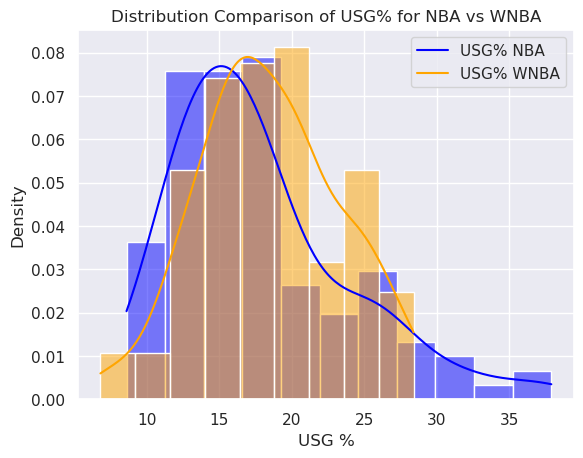

In [29]:
sns.histplot(data = nba_adv, x = 'USG%', stat = 'density', color = 'blue', kde = True)
sns.histplot(data = wnba_adv, x = 'USG%', stat = 'density', color = 'orange', kde = True)
plt.xlabel('USG %')
plt.title('Distribution Comparison of USG% for NBA vs WNBA')
plt.legend(labels=["USG% NBA","USG% WNBA"])

Because usage is much more concentrated in WNBA, this allows measures of efficiency to better reflect the valuable players that teams depend on to win. NBA valuable superstar players exist on the tail end of the green curve as outliers, not usually the most efficient because efficiency regresses some with the gaudy usage. However these outliers are more responsible for their team's success.

## Clustering across EFG and TS for each league

first for TS and EFG

In [58]:
x = nba_adv['TS%'] 
y = nba_adv['EFG%']
df = pd.DataFrame([x,y])
x1 = df.transpose()
x1

,TS%,EFG%
0,56.8,53.6
1,56.5,52.2
2,57.3,52.8
3,66.0,63.0
4,60.7,55.3
...,...,...
109,58.7,53.5
110,58.8,56.4
111,64.0,58.8
112,53.7,51.4


find appropriate number of clusters

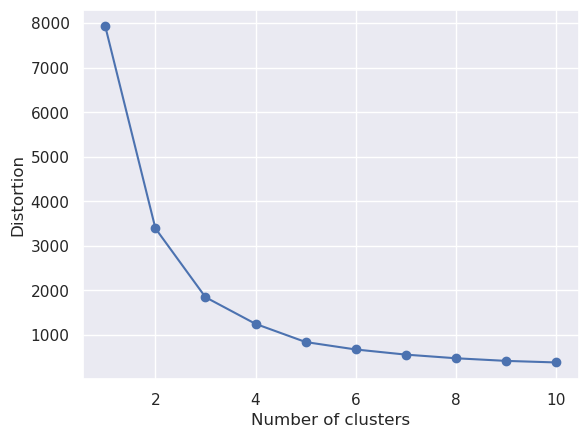

In [59]:
distortions = []
for i in range(1, 11):
    km = cluster.KMeans(n_clusters=i, random_state=42).fit(x1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(58.3, 53.3, 'Paul George')

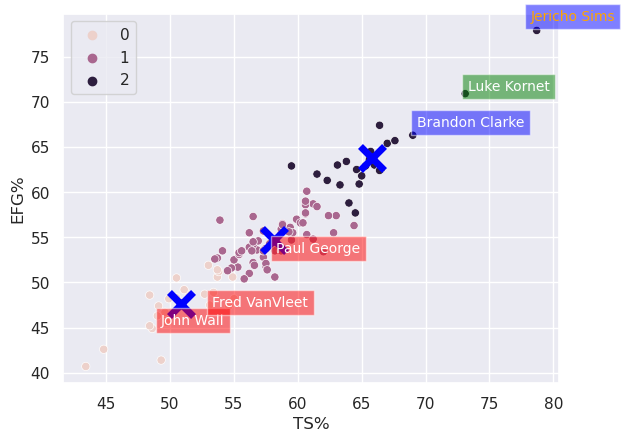

In [60]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42).fit(x1)
sns.scatterplot(x=x, y=y, hue=kmeans.labels_)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);
plt.text(x=77.9 +0.3,
         y=78.7 + 0.3,
         s= 'Jericho Sims',
         fontdict=dict(color='orange',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=73 +0.3,
         y=71 + 0.3,
         s= 'Luke Kornet',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='green',alpha=0.5))
plt.text(x=69 +0.3,
         y=67 + 0.3,
         s= 'Brandon Clarke',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=49 +0.3,
         y=45 + 0.3,
         s= 'John Wall',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=53 +0.3,
         y=47 + 0.3,
         s= 'Fred VanVleet',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=58 +0.3,
         y=53 + 0.3,
         s= 'Paul George',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))

all players in the lowest cluster are guards or forwards, and their usage is an average of ~17%, 3 pecentage points higher than the nba players with a TS% > 65

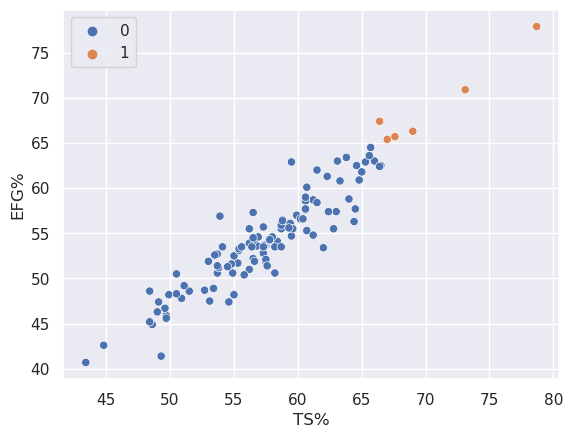

In [61]:
aggclust = cluster.AgglomerativeClustering(linkage = 'complete').fit(x1)
sns.scatterplot(x=x, y=y, hue=aggclust.labels_);

In [62]:
df1 = pd.DataFrame([wnba_adv['TS%'],wnba_adv['EFG%']])
x2 = df1.transpose()
x2

,TS%,EFG%
0,58.5,53.1
1,54.8,48.6
2,54.9,50.0
3,54.3,50.0
4,50.7,47.1
...,...,...
113,45.3,45.5
114,38.8,34.8
115,55.0,52.5
116,47.0,42.5


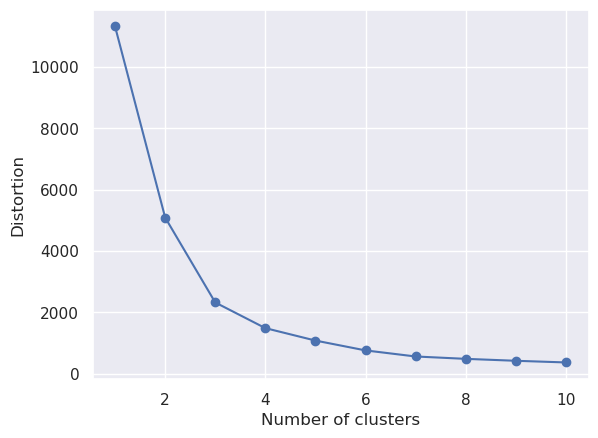

In [63]:
distortions = []
for i in range(1, 11):
    km = cluster.KMeans(n_clusters=i, random_state=42).fit(x2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(62, 58, 'Jonquel Jones')

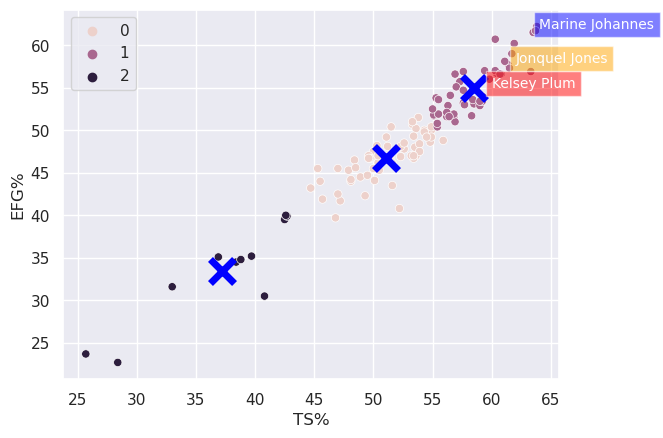

In [64]:
kmeans1 = cluster.KMeans(n_clusters=3, random_state=42).fit(x2)
sns.scatterplot(x=wnba_adv['TS%'], y=wnba_adv['EFG%'], hue=kmeans1.labels_)
sns.scatterplot(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);
plt.text(x=63 +1,
         y=61 + 1,
         s= 'Marine Johannes',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='blue',alpha=0.5))
plt.text(x=60,
         y=55,
         s= 'Kelsey Plum',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=62,
         y=58,
         s= 'Jonquel Jones',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='orange',alpha=0.5))

players in the low cluster have avg usage of about 16 percent, 3 percent lower than the upper cluster

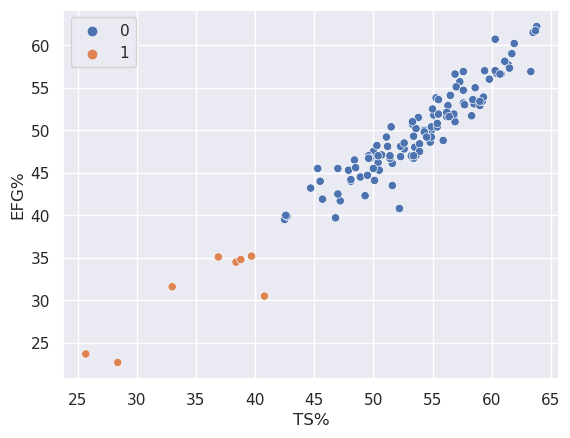

In [65]:
aggclust1 = cluster.AgglomerativeClustering(linkage = 'complete').fit(x2)
sns.scatterplot(x=wnba_adv['TS%'], y=wnba_adv['EFG%'], hue=aggclust1.labels_);

### load more shooting data for both leagues

In [66]:
nba_shoot = pd.read_csv("NBAshooting.csv")
wnba_shoot = pd.read_csv("WNBAshoot3.csv")

<AxesSubplot:xlabel='3P%', ylabel='3P%'>

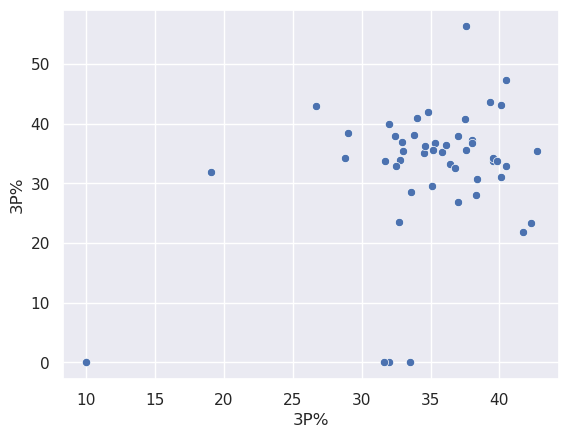

In [67]:
sns.scatterplot(x=nba_shoot["3P%"], y=wnba_shoot['3P%'])

<AxesSubplot:xlabel='FT%', ylabel='FT%'>

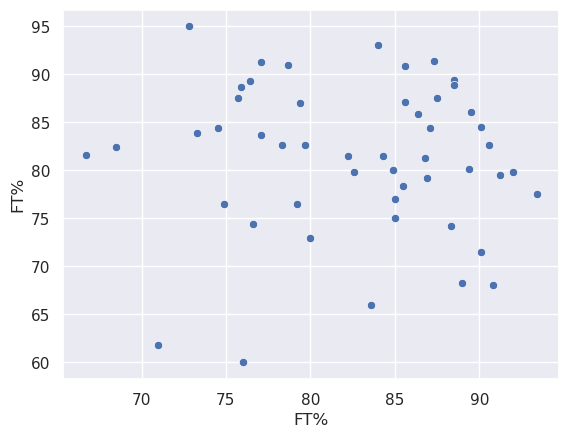

In [68]:
sns.scatterplot(x=nba_shoot["FT%"], y=wnba_shoot['FT%'])

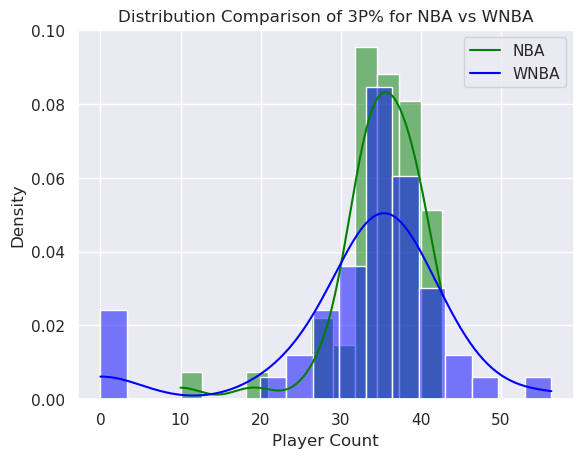

In [69]:
sns.histplot(data = nba_shoot, x = '3P%', stat = 'density', color = 'green', kde = True)
sns.histplot(data = wnba_shoot, x = '3P%', stat = 'density', color = 'blue', kde = True)
plt.xlabel('Player Count')
plt.title('Distribution Comparison of 3P% for NBA vs WNBA')
plt.legend(labels=["NBA","WNBA"])

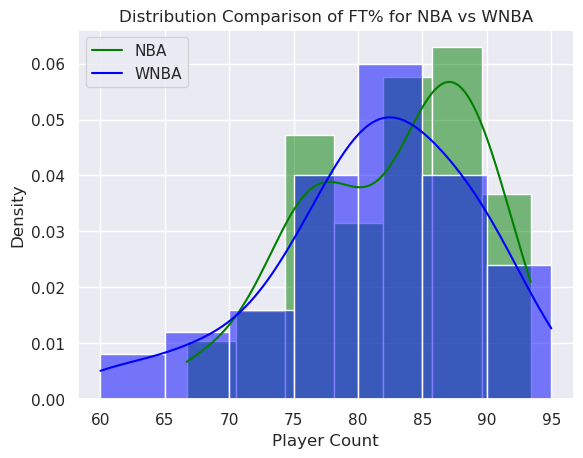

In [70]:
sns.histplot(data = nba_shoot, x = 'FT%', stat = 'density', color = 'green', kde = True)
sns.histplot(data = wnba_shoot, x = 'FT%', stat = 'density', color = 'blue', kde = True)
plt.xlabel('Player Count')
plt.title('Distribution Comparison of FT% for NBA vs WNBA')
plt.legend(labels=["NBA","WNBA"])

In [71]:
df2 = pd.DataFrame([nba_adv['USG%'],nba_adv['TO RATIO']])
x3 = df2.transpose()
x3

,USG%,TO RATIO
0,11.0,13.6
1,16.7,10.4
2,21.3,5.3
3,16.0,10.1
4,17.6,12.0
...,...,...
109,30.4,12.4
110,18.9,9.0
111,13.1,14.7
112,10.3,7.2


/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(37.0, 11.7, 'Giannis Antetokounmpo')

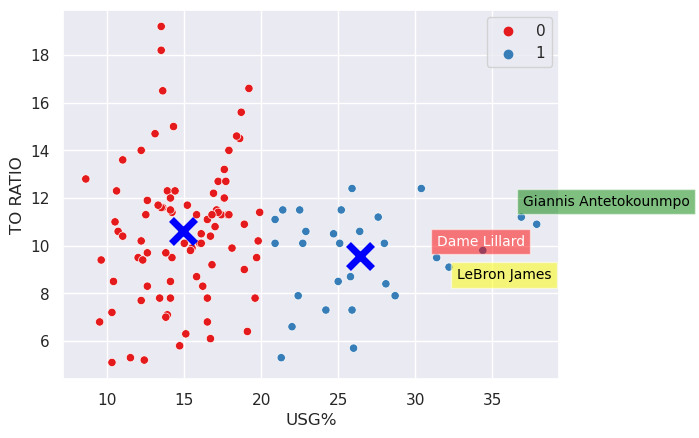

In [72]:
kmeans2 = cluster.KMeans(n_clusters=2, random_state=42).fit(x3)
sns.scatterplot(x=nba_adv['USG%'], y=nba_adv['TO RATIO'], hue=kmeans2.labels_, palette='Set1')
sns.scatterplot(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);
plt.text(x=31.4,
         y=9.5 + .5,
         s= 'Dame Lillard',
         fontdict=dict(color='white',size=10),
         bbox=dict(facecolor='red',alpha=0.5))
plt.text(x=32.2 + .5,
         y=9.1 - .5,
         s= 'LeBron James',
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='yellow',alpha=0.5))
plt.text(x=36.5 + .5,
         y=11.2 + .5,
         s= 'Giannis Antetokounmpo',
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='green',alpha=0.5))

In [73]:
df3 = pd.DataFrame([wnba_adv['USG%'],wnba_adv['TO RATIO']])
x4 = df3.transpose()
x4

,USG%,TO RATIO
0,26.7,8.3
1,20.9,14.6
2,19.9,13.5
3,21.9,8.3
4,13.4,19.6
...,...,...
113,15.3,20.5
114,13.9,10.6
115,15.2,3.8
116,15.6,15.5


/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(26.9, 8.8, "A'ja Wilson")

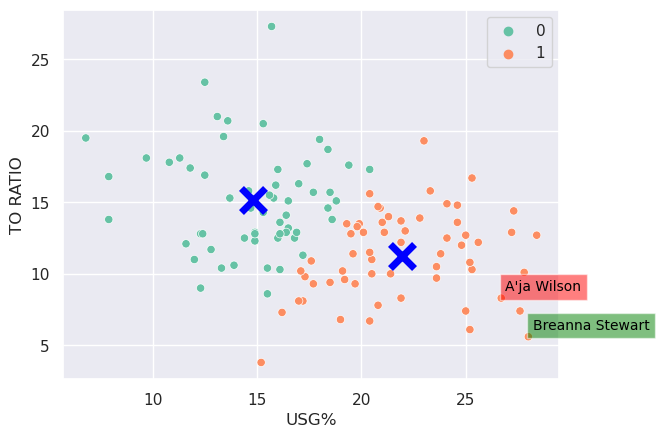

In [74]:
kmeans3 = cluster.KMeans(n_clusters=2, random_state=42).fit(x4)
sns.scatterplot(x=wnba_adv['USG%'], y=wnba_adv['TO RATIO'], hue=kmeans3.labels_, palette='Set2')
sns.scatterplot(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], color='blue', marker='x', s=300, linewidth=5);
plt.text(x=28 + .2,
         y=5.6 + .5,
         s= 'Breanna Stewart',
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='green',alpha=0.5))
plt.text(x=26.7 + .2,
         y=8.3 + .5,
         s= "A'ja Wilson",
         fontdict=dict(color='black',size=10),
         bbox=dict(facecolor='red',alpha=0.5))

## Logistic regression predicting whether someone is a scorer based off usage in WNBA

In [49]:
def classify_wnba(float):
    if float >= 11:
        return 'Star Scorer'
    if float <11:
        return 'Not Star Scorer'
wnba_shoot["is_star_scorer"] = wnba_shoot["PTS"].map(classify_wnba)

In [50]:
shooting_adv_wnba = wnba_shoot.merge(wnba_adv, on='PLAYER', how = 'left')

In [51]:
shooting_adv_wnba['is_star_shooter'] = (shooting_adv_wnba['is_star_scorer'] == 'Star Scorer').astype(int)


In [52]:
# Define our features/design matrix X
X = shooting_adv_wnba[["USG%"]].dropna()
Y = shooting_adv_wnba['is_star_shooter'][0:46].dropna()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(f"Training Data Size: {len(X_train)}")
print(f"Test Data Size: {len(X_test)}")

Training Data Size: 34
Test Data Size: 12


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
        fit_intercept=True,
        solver = 'lbfgs')

lr.fit(X_train, Y_train)
lr.intercept_, lr.coef_

(array([-7.40663247]), array([[0.49143948]]))

In [55]:
train_accuracy = (sum(lr.predict(X_train) == Y_train))/34
test_accuracy = (sum(lr.predict(X_test) == Y_test))/12

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.9412
Test accuracy: 0.9167


In [56]:
plot_df = pd.DataFrame({"X": np.squeeze(X_train),
                        "Y": Y_train,
                        "Y_pred": lr.predict(X_train),
                        "correct": (Y_train == lr.predict(X_train))})
sns.stripplot(data=plot_df, x="X", y="Y", orient='h', alpha=0.5, hue="correct")
plt.xlabel('mean radius, $x$')
plt.ylabel('$y$')
plt.yticks(ticks=[0, 1], labels=['0:\nbenign', '1:\nmalignant'])
plt.title("Predictions for decision threshold T = 0.5")
plt.show()

ValueError: array length 34 does not match index length 41

In [ ]:
Y_test_pred = lr.predict(X_test)

precision = (sum((Y_test_pred == Y_test) & Y_test == 1)) / (sum((Y_test_pred == Y_test) & Y_test == 1) + sum((Y_test_pred != Y_test) & (Y_test == 0) & Y_test_pred ==1))
recall = (sum((Y_test_pred == Y_test) & Y_test == 1)) / (sum((Y_test_pred == Y_test) & Y_test == 1) + sum((Y_test == 1) & (Y_test_pred ==0)))

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

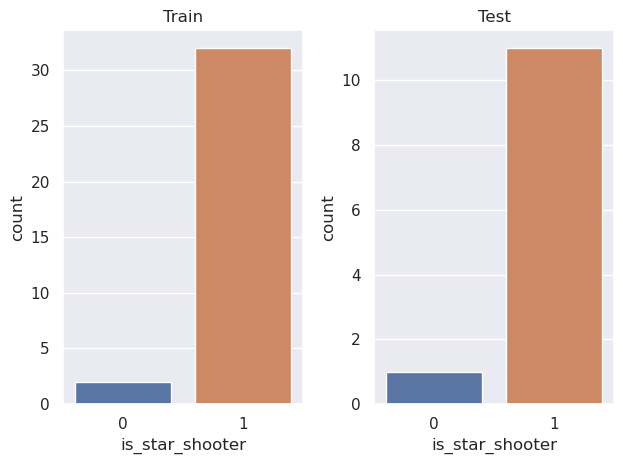

In [57]:
fig, axes = plt.subplots(1, 2)
sns.countplot(x=Y_train, ax=axes[0]);
sns.countplot(x=Y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();